In [1]:
#Aikasarjaennustaminen - ei trendiä eikä kausivaihtelua
#Yksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa ei ole havaittavaa trendiä tai kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
df=pd.read_excel('Saapuneet puhelut kktasolla.xlsx')
df

,Kuukausi,Saapuneet
0,2017-12-01,3714
1,2018-01-01,6185
2,2018-02-01,5615
3,2018-03-01,5381
4,2018-04-01,7284
5,2018-05-01,20116
6,2018-06-01,13238
7,2018-07-01,7594
8,2018-08-01,7968
9,2018-09-01,31344


In [5]:
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df

,Saapuneet
Kuukausi,
2017-12-01,3714
2018-01-01,6185
2018-02-01,5615
2018-03-01,5381
2018-04-01,7284
2018-05-01,20116
2018-06-01,13238
2018-07-01,7594
2018-08-01,7968


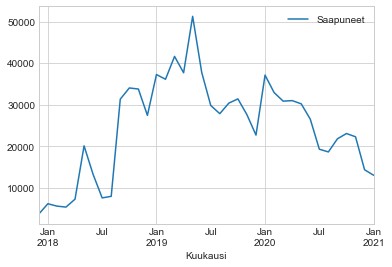

In [6]:
df.plot()

In [7]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'MS', koska kyseessä oN kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], freq = 'MS').fit()

In [8]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Kone-ennuste'] = malli.fittedvalues
df

,Saapuneet,Kone-ennuste
Kuukausi,,
2017-12-01,3714,4232.126593
2018-01-01,6185,3825.296356
2018-02-01,5615,5678.123072
2018-03-01,5381,5628.559173
2018-04-01,7284,5434.177031
2018-05-01,20116,6886.648161
2018-06-01,13238,17274.264670
2018-07-01,7594,14105.011177
2018-08-01,7968,8992.599925


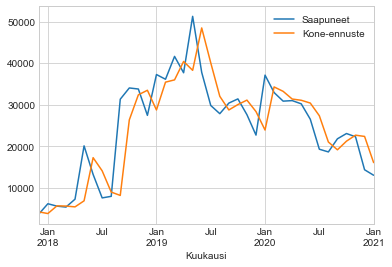

In [9]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [10]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Kone-ennuste,Ennustevirhe
Kuukausi,,,
2017-12-01,3714,4232.126593,-518.126593
2018-01-01,6185,3825.296356,2359.703644
2018-02-01,5615,5678.123072,-63.123072
2018-03-01,5381,5628.559173,-247.559173
2018-04-01,7284,5434.177031,1849.822969
2018-05-01,20116,6886.648161,13229.351839
2018-06-01,13238,17274.264670,-4036.264670
2018-07-01,7594,14105.011177,-6511.011177
2018-08-01,7968,8992.599925,-1024.599925


Text(0, 0.5, 'Ennustevirhe')

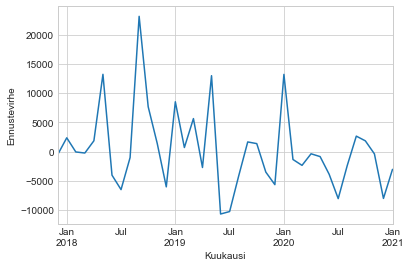

In [11]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

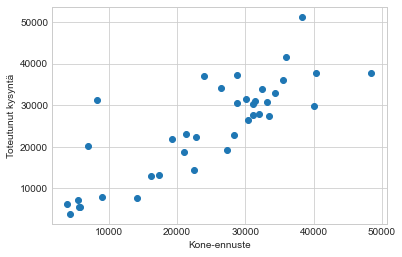

In [12]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Kone-ennuste'], y = df['Saapuneet'])
plt.xlabel('Kone-ennuste')
plt.ylabel('Toteutunut kysyntä')

In [13]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Kone-ennuste,Ennustevirhe
Kuukausi,,,
2020-09-01,21814,19167.961373,2646.038627
2020-10-01,23083,21245.616791,1837.383209
2020-11-01,22302,22688.320288,-386.320288
2020-12-01,14365,22384.983658,-8019.983658
2021-01-01,13044,16087.735262,-3043.735262


In [17]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-02-01', periods = 6, freq = 'MS')

# Ennusteet 6 kuukaudelle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-02-01,13697.810567
2021-03-01,13697.810567
2021-04-01,13697.810567
2021-05-01,13697.810567
2021-06-01,13697.810567
2021-07-01,13697.810567


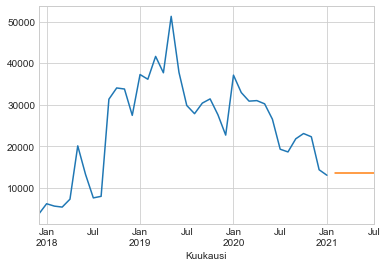

In [18]:
# Viivakaavio havainnoista
#Huomaa, että yksinkertainen eksponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [19]:
df.head()

,Saapuneet,Kone-ennuste,Ennustevirhe
Kuukausi,,,
2017-12-01,3714,4232.126593,-518.126593
2018-01-01,6185,3825.296356,2359.703644
2018-02-01,5615,5678.123072,-63.123072
2018-03-01,5381,5628.559173,-247.559173
2018-04-01,7284,5434.177031,1849.822969
